In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0db7ce3220>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0db7ce3760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0db7ce2f80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0db7ce3ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0db7ce3f40>],
 'means': []}

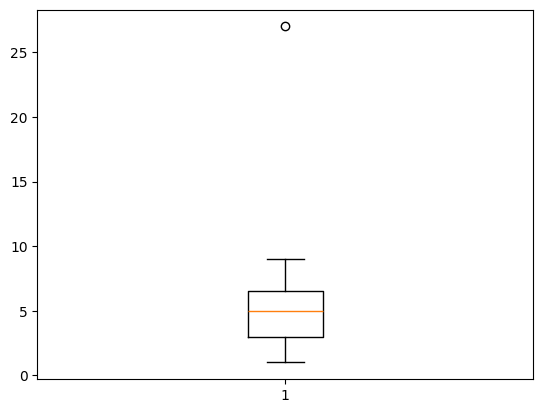

In [3]:
x = (1,2,2,2,3,3,4,5,5,5,6,6,6,6,7,8,8,9,27)

plt.boxplot(x)

<Axes: xlabel='total_bill', ylabel='Count'>

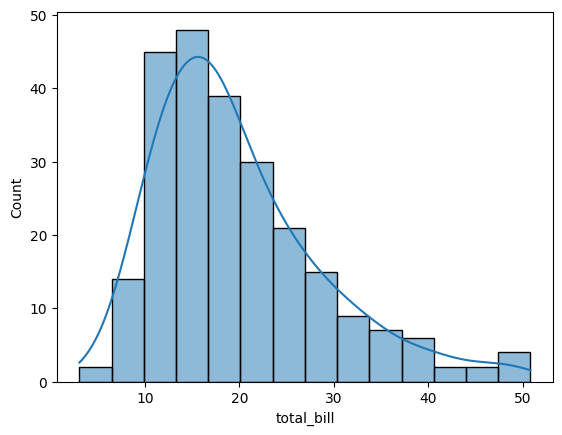

In [9]:
a = sns.load_dataset('tips')

a.head()
histo = a['total_bill']
sns.histplot(histo , kde = True)

<Axes: ylabel='Count'>

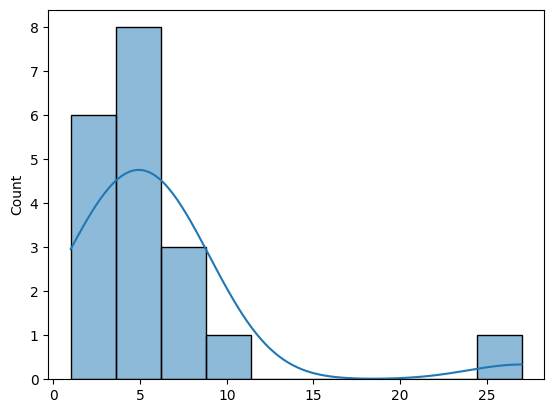

In [16]:
sns.histplot(x, kde= True)

In [19]:
df = sns.load_dataset('iris')
dfmini = df['sepal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

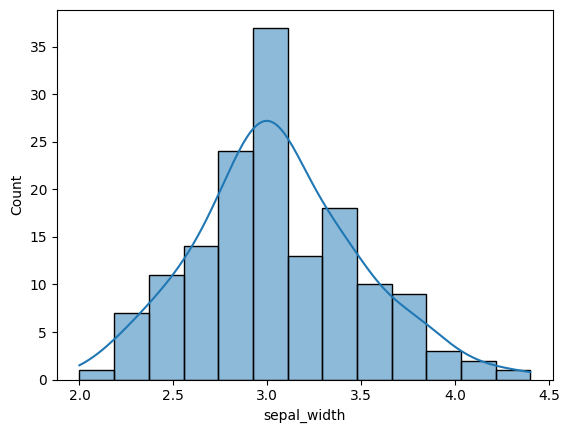

In [20]:
sns.histplot(dfmini, kde= True)

In [32]:
data = [11,12,11,13,11,14,103,12,15,14,100,12,15,16,16,17,14,107,16,18,18,18,18,19,19,14,16,16,13,19,12,12,20]



In [26]:
np.median(data)

15.5

21.59417962669571

In [33]:
outliers = []


def detect_outliers(data):
    thresold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std  ## Z score formula z = (x-μ)/σ
        if np.abs(z_score)>thresold:
            outliers.append(i)

    return outliers
        

            


In [34]:
detect_outliers(data)

[103, 100, 107]

#IQR
1. Sorting the data
2. Calculate Q1 and Q3
3. IQR(Q3 - Q1)
4. Find lower fence (q1-1.5(iqr))
5. Find upper fence (q1+1.5(iqr))

In [36]:
data = sorted(data)
data

[11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 20,
 100,
 103,
 107]

In [38]:
q1,q3 = np.percentile(data,[25,75])

q1,q3

(13.0, 18.0)

In [39]:
IQR = q3- q1

IQR

5.0

In [41]:
## Find the lower fence and upper fence
lower_fence = q1 - (1.5* IQR)
upper_fence = q3 + (1.5*IQR)

In [42]:
lower_fence, upper_fence

(5.5, 25.5)

<Axes: >

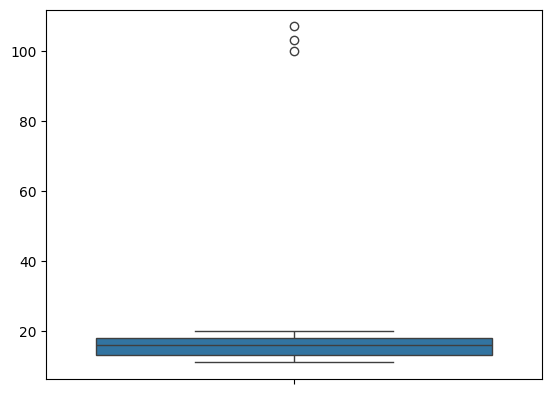

In [43]:
sns.boxplot(data)

In [63]:


def remove_outliers(data):
    new_data =[]
    for i in data:
        if i >= upper_fence:
            new_data.append(i)
    return new_data

In [64]:
remove_outliers(data)

[100, 103, 107]